# Assignment 0 - Task 1

Importing neccessary libraries and loading the data

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import seaborn as sns
import umap
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Load the data
train_in = pd.read_csv('/Users/tanishakasar/Desktop/MNIST_data/data/train_in - Copy.csv', header=None).values  # Shape: (1707, 256)
train_out = pd.read_csv('/Users/tanishakasar/Desktop/MNIST_data/data/train_out - Copy.csv', header=None).values.flatten()  # Shape: (1707)
test_in = pd.read_csv('/Users/tanishakasar/Desktop/MNIST_data/data/test_in - Copy.csv', header=None).values  # Shape: (1000, 256)
test_out = pd.read_csv('/Users/tanishakasar/Desktop/MNIST_data/data/test_out - Copy.csv', header=None).values.flatten()  # Shape: (1000)


## Part 1: High Dimensional Cloud of Points 

### Printing an Image from the Dataset 

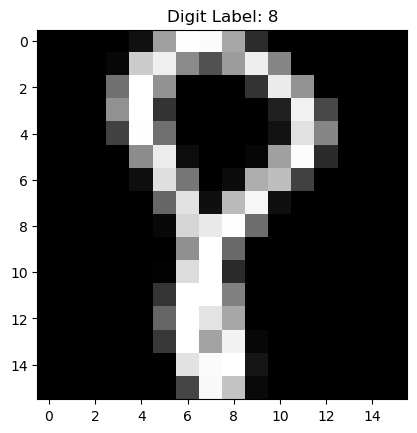

In [3]:
# Pick an index of the image you want to display
index = 54

# Get the corresponding 256-dimensional vector from train_in
image_vector = train_in[index]

# Reshape the 256-dimensional vector into a 16x16 2D array
image_2d = image_vector.reshape(16, 16)

# Plot the image
plt.imshow(image_2d, cmap='gray')
plt.title(f"Digit Label: {train_out[index]}")
plt.show()


### Computing the Center (Mean) Point of Each Digit 

This is done by taking the average value for each index of the 256 size vector accross all training data, for each digit. This yeilds one vector of length 256 for each digit.

In [4]:
# Initializing an empty array to store the centers for digits 0-9
digit_centers = np.zeros((10, 256))  # Shape: (10, 256)

# Computing the center for each digit
for digit in range(10):
    
    # Get all vectors corresponding to the current digit
    digit_vectors = train_in[train_out == digit]
    
    # Compute the mean (center) of the cloud for this digit
    digit_centers[digit] = np.mean(digit_vectors, axis=0)

### Printing an Image of a Specified Digit's Centroid (Visualization)

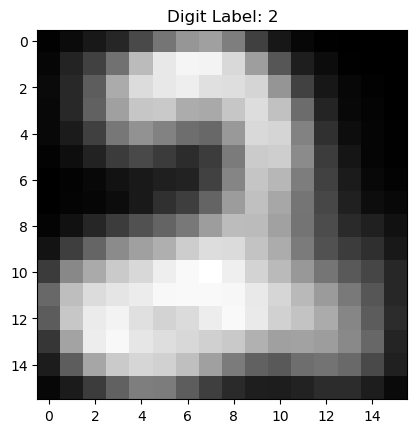

In [25]:
# Pick the digit of the centroid to be displayed
index = 2

# Get the corresponding 256-dimensional vector from train_in
center_image_vector = digit_centers[index]

# Reshape the 256-dimensional vector into a 16x16 2D array
image_mean = center_image_vector.reshape(16, 16)

# Plot the image using matplotlib
plt.imshow(image_mean, cmap='gray')
plt.title(f"Digit Label: {index}")
plt.show()


### Printing an Instance of Each Digit's Centroid (Visualization)

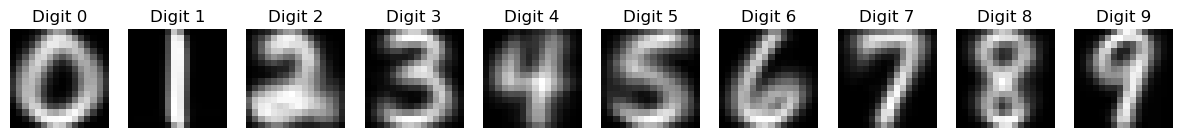

In [6]:
# Number of digits (0-9)
num_digits = 10

# Create a figure to display all digit centers
fig, axes = plt.subplots(1, num_digits, figsize=(15, 5))

# loop through each digit (0-9) and plot the center
for digit in range(num_digits):
    # Get the center vector for the current digit
    center_vector = digit_centers[digit]
    
    # Reshape the 256-dimensional vector into a 16x16 2D array
    center_image = center_vector.reshape(16, 16)
    
    # Plot the image
    axes[digit].imshow(center_image, cmap='gray')
    axes[digit].set_title(f'Digit {digit}')
    axes[digit].axis('off')  # Turn off axis

plt.show()


### Pair-wise Distance between Digit Centers (Means)

The normalized eucleidean distance between each digit center is calculated and plotted onto a confusion matrix for comparisions. Darker colors imply closeness - hence, similarity, and lighter colors imply the opposite.

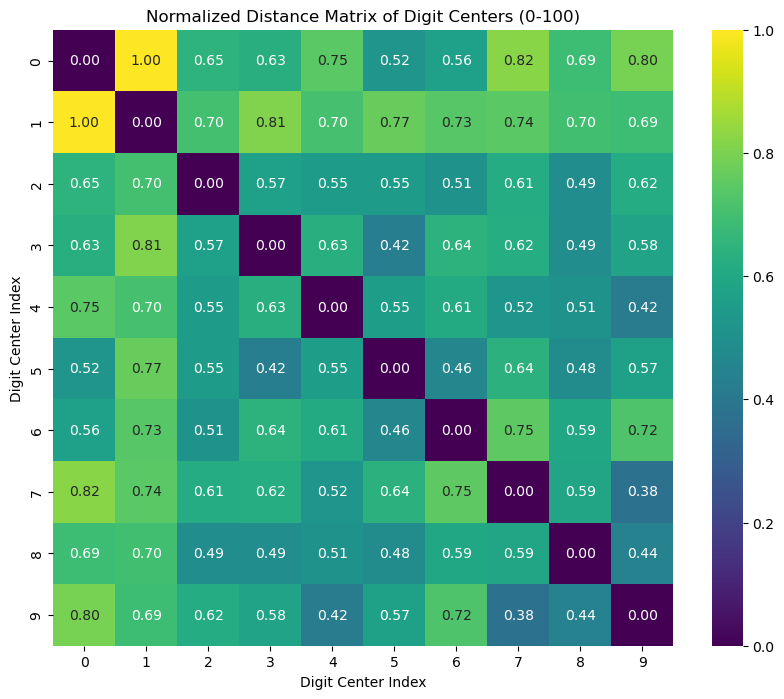

In [9]:
# Compute the distance matrix between all digit centers
distance_matrix = cdist(digit_centers, digit_centers, metric='euclidean')

# Normalize the distance matrix to the range 0-100
min_val = np.min(distance_matrix)
max_val = np.max(distance_matrix)
normalized_matrix = 1 * (distance_matrix - min_val) / (max_val - min_val)

# Create a heatmap of the normalized distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_matrix, annot=True, cmap='viridis', fmt='.2f',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Normalized Distance Matrix of Digit Centers (0-100)')
plt.xlabel('Digit Center Index')
plt.ylabel('Digit Center Index')
plt.show()


### Data Analysis

The distribution of data is analyzed to check for fair and equal representation of all digits in the data. An unequal distribuation can lead to biases in not accurately identifying the true center of an underrepresented digit due to its fewer number of datapoints. The distrbution of digits in the training data is plotted in the form of a bar chart for visualization.

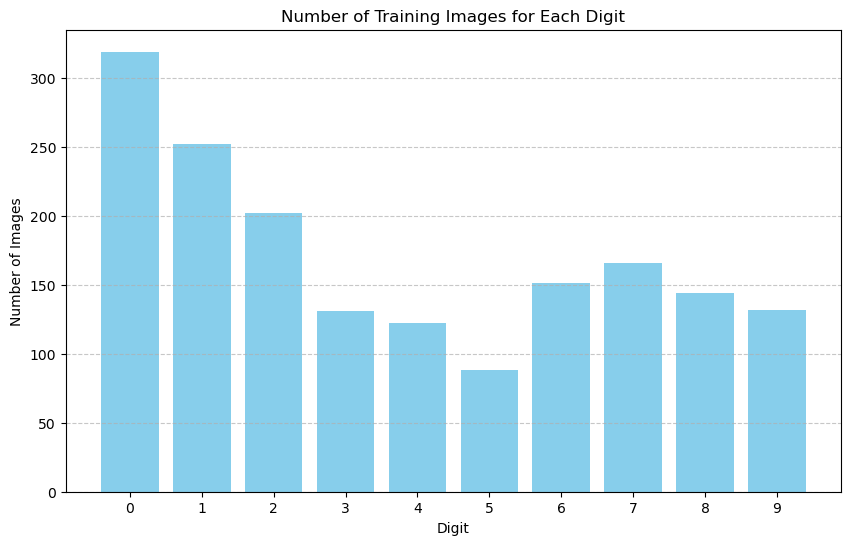

In [10]:
# Count occurrences of each digit (0 through 9)
digit_counts = np.bincount(train_out, minlength=10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(10), digit_counts, color='skyblue')
plt.xlabel('Digit')
plt.ylabel('Number of Images')
plt.title('Number of Training Images for Each Digit')
plt.xticks(range(10))  # Set x-ticks to be digits 0-9
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The digit 5 here has the lowest count, while the digit 1 has the highest - almost twice that of 5.

### Brief Analysis and Conclusions Drawn 

- **Confusion is probably happening with similar digits that also have a low count in the train set.**
- **For example 1 and 7 can be mistaken for each other but because 1 has a lot of data - the confusion isnt as high**
- **7 and 9 both have less data - more confusion?**
- **1 is visually distinct and has high train data amount**

## Part 2: Dimensionality Reduction

In this section, dimensionality reduction algorithms like PCA, U-MAP, and T-SNE are applied to the MNIST data to generate a visualization of the different classes.

### 1. PCA

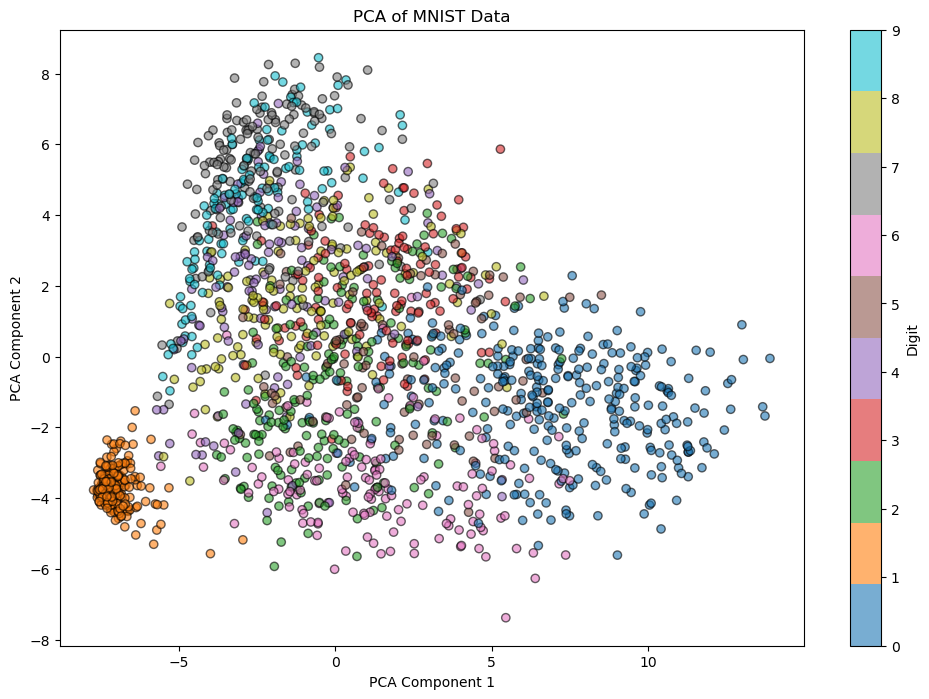

In [14]:
# Perform PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_in)

# Plot PCA results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_out, cmap='tab10', alpha=0.6, edgecolor='k')
plt.colorbar(scatter, ticks=range(10), label='Digit')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of MNIST Data')
plt.show()

### 2. UMAP

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


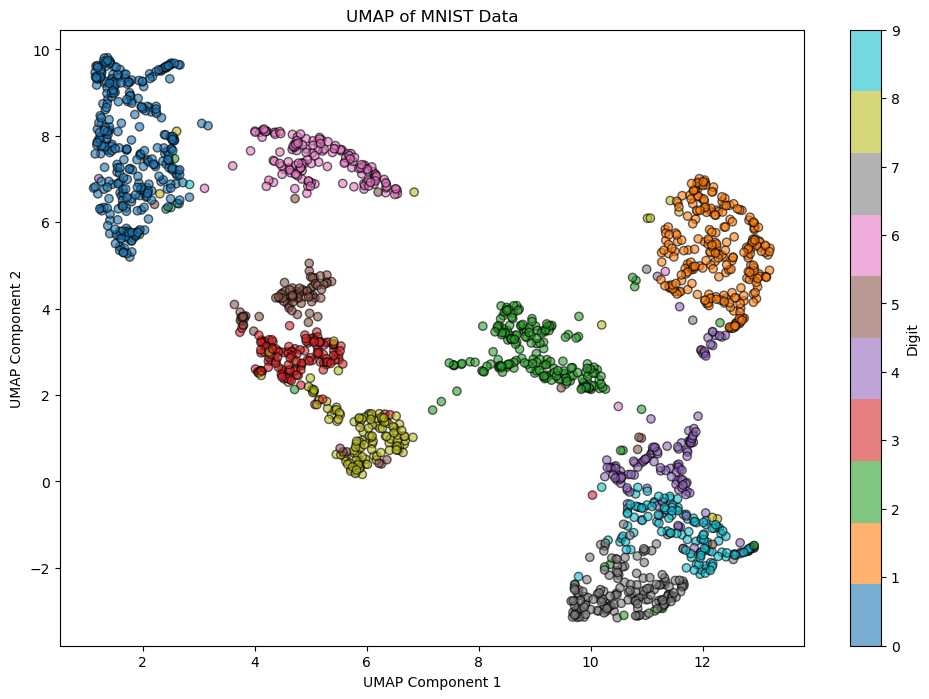

In [16]:
# Perform UMAP to reduce the dimensionality to 2D
umap_model = umap.UMAP(n_components=2)
umap_result = umap_model.fit_transform(train_in)

# Plot UMAP results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=train_out, cmap='tab10', alpha=0.6, edgecolor='k')
plt.colorbar(scatter, ticks=range(10), label='Digit')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of MNIST Data')
plt.show()


### 3. T-SNE

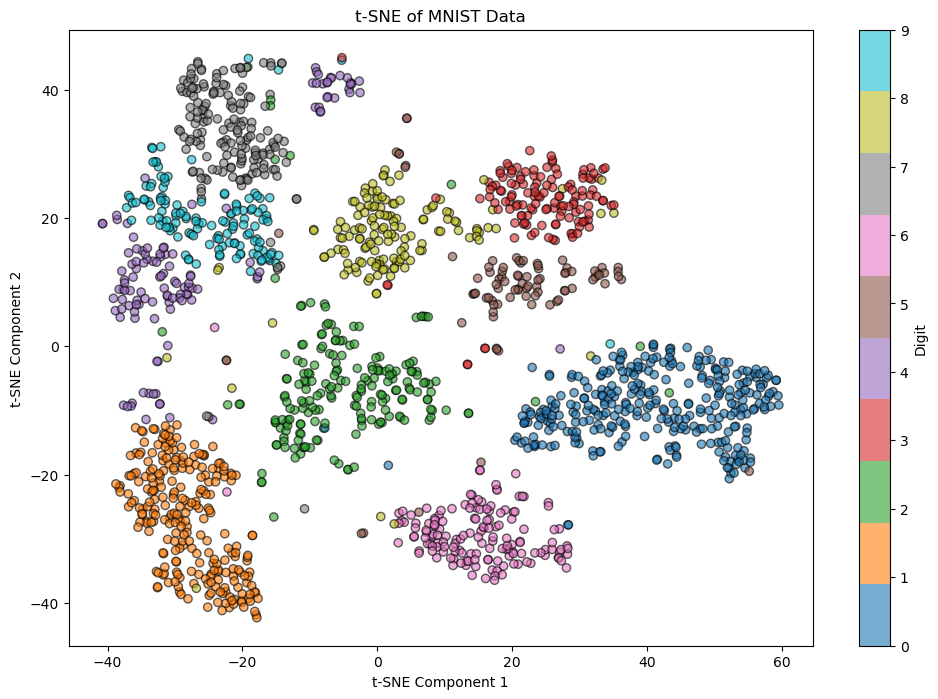

In [17]:
# Perform t-SNE to reduce the dimensionality to 2D
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(train_in)

# Plot t-SNE results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=train_out, cmap='tab10', alpha=0.6, edgecolor='k')
plt.colorbar(scatter, ticks=range(10), label='Digit')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of MNIST Data')
plt.show()


- **7,9,4 seem to cluster together**
- **PCA clustered the worst**
- **1 always distinct**
- **5 and 3 close**
- **Visualize centers - consistent with part 1**

## Part 3: Nearest Mean Classifier

### Classification of Images 

This function classifies each image by finding the "closest" center digit to it, and assigns the image as being of the same digit.
Here, the "closeness" is meaasured by way of comparision of the input 256 length vector to each of the centers vectors via eucledian distances.

In [20]:
def classify_image(image, centers):
    
    # Compute the Euclidean distance to each center
    distances = cdist([image], centers, metric='euclidean').flatten()

    # Return the label of the closest center
    return np.argmin(distances)

### Classification of Train and Test Datasets and Calculation of Accuracy

The method employed here has an overall accuracy of 80.4% on the test set and 86.35% on the train set. The similarity in accuracies shows that the algorithm did not overfit nor underfit the train set.

In [23]:
# Classify all test images
test_predictions = np.array([classify_image(img, digit_centers) for img in test_in])

# Calculate the accuracy
accuracy = np.mean(test_predictions == test_out)
print(f"Test set accuracy: {accuracy * 100:.2f}%")

Test set accuracy: 80.40%


In [24]:
# Classify all train images
train_predictions = np.array([classify_image(img, digit_centers) for img in train_in])

# Calculate the accuracy
accuracy = np.mean(train_predictions == train_out)
print(f"Train set accuracy: {accuracy * 100:.2f}%")

Train set accuracy: 86.35%


### Computing Digit-wise Accuracies 

This allows for a digit-wise analysis to dscern what digits are being recognized poorly therefore bring down total accuracy. The lowest ones here are the digits 2 and 5, with the highest being digits 1 with 99% accuracy. As the accuracies are ismilar on the train and test set - the test set is used here. 

In [26]:
# Initialize arrays to store counts of true positives and total occurrences for each digit
true_positives = np.zeros(10)
total_per_digit = np.zeros(10)

# Iterate over each digit to compute the counts
for digit in range(10):
    # Get indices where the true label is the current digit
    indices = np.where(test_out == digit)[0]
    
    # Count the number of correct predictions for this digit
    correct_predictions = np.sum(test_predictions[indices] == digit)
    
    # Update counts
    true_positives[digit] = correct_predictions
    total_per_digit[digit] = len(indices)

# Compute accuracy for each digit
digit_wise_accuracy = true_positives / total_per_digit * 100

# Print digit-wise accuracy
for digit, accuracy in enumerate(digit_wise_accuracy):
    print(f"Digit {digit}: {accuracy:.2f}% accuracy")

Digit 0: 79.46% accuracy
Digit 1: 99.17% accuracy
Digit 2: 68.32% accuracy
Digit 3: 77.22% accuracy
Digit 4: 80.23% accuracy
Digit 5: 69.09% accuracy
Digit 6: 86.67% accuracy
Digit 7: 78.12% accuracy
Digit 8: 79.35% accuracy
Digit 9: 77.27% accuracy


A bar chart is used to help visualize and compare digit accuracies with one another.

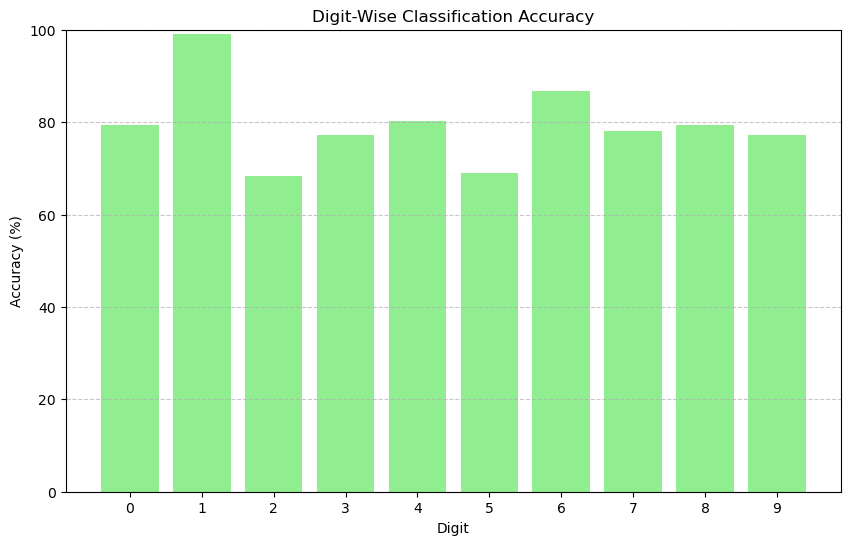

In [27]:
# Create a bar chart for digit-wise accuracy
plt.figure(figsize=(10, 6))
plt.bar(range(10), digit_wise_accuracy, color='lightgreen')
plt.xlabel('Digit')
plt.ylabel('Accuracy (%)')
plt.title('Digit-Wise Classification Accuracy')
plt.xticks(range(10))  # Set x-ticks to be digits 0-9
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Additionally, a confusion matrix allows for further analysis into classes that are difficult to separate

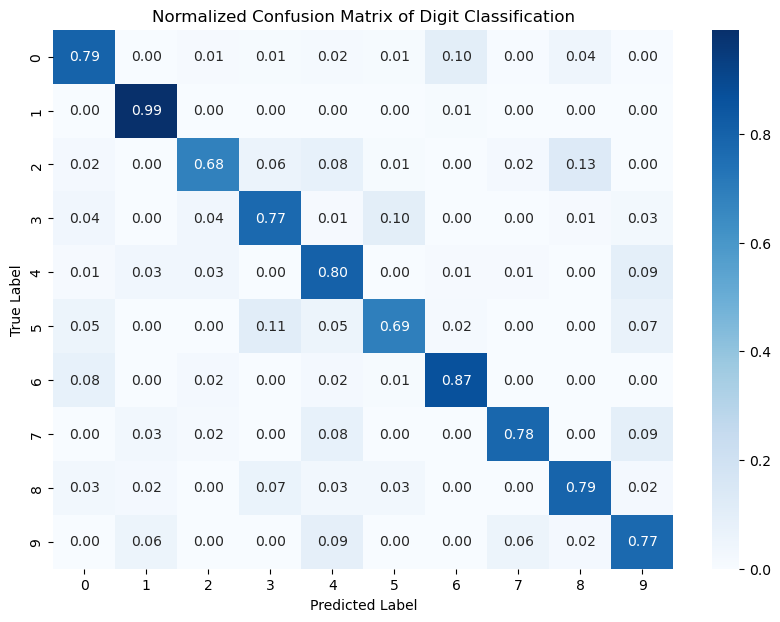

In [31]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(test_out, test_predictions)

# Normalize the confusion matrix by dividing each row by the sum of its elements
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", cbar=True, xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix of Digit Classification')
plt.show()


### Part 4: K Nearest Neighbor 

Using hyperparameter k=3, we compute the accuracies on the train and test datasets fit to a k-NN model. A confusion matrix is computed for further analysis. 

In [19]:
# Initialize the k-NN classifier with k=3 
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the model using the training data
knn_classifier.fit(train_in, train_out)

# Predict the labels for the training set
train_predictions_knn = knn_classifier.predict(train_in)
train_accuracy_knn = accuracy_score(train_out, train_predictions_knn)
print(f"k-NN Training set accuracy: {train_accuracy_knn * 100:.2f}%")

# Predict the labels for the test set
test_predictions_knn = knn_classifier.predict(test_in)
test_accuracy_knn = accuracy_score(test_out, test_predictions_knn)
print(f"k-NN Test set accuracy: {test_accuracy_knn * 100:.2f}%")


k-NN Training set accuracy: 97.89%
k-NN Test set accuracy: 91.40%


### Confusion Matrix

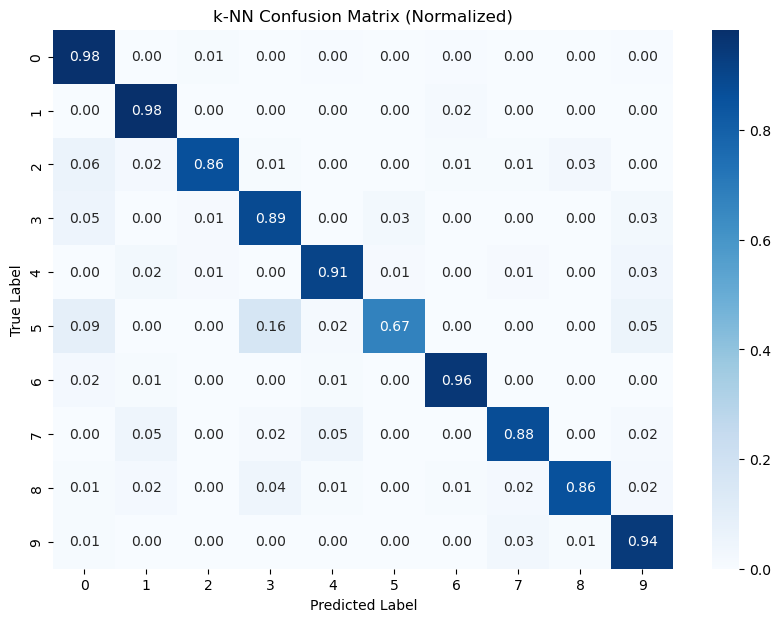

In [32]:
# Generate the confusion matrix for k-NN predictions
conf_matrix_knn = confusion_matrix(test_out, test_predictions_knn)

# Normalize the confusion matrix by dividing each row by the sum of its elements
conf_matrix_knn_normalized = conf_matrix_knn.astype('float') / conf_matrix_knn.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('k-NN Confusion Matrix (Normalized)')
plt.show()